# Exploratory Data Analysis of RADS pkl

#### Charlotte Burbridge! :)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Reading the pickles

In [40]:
rads = pd.read_pickle('data-prep/pkl/rads.pkl')

avy = pd.read_pickle('data-prep/pkl/avy_obs.pkl')
avy["ignore"] = np.nan
avy["ignore"].fillna(5, inplace=True)
# https://stackoverflow.com/questions/16327055/how-to-add-an-empty-column-to-a-dataframe

In [4]:
rads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    794 non-null    object 
 1   Time    794 non-null    object 
 2   Score   701 non-null    float64
 3   Level   794 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 24.9+ KB


In [41]:
avy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 1 to 508
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   avpathid           491 non-null    object        
 1   avobsdate          491 non-null    datetime64[ns]
 2   avobstime          491 non-null    object        
 3   avobserverid       491 non-null    object        
 4   avtype             485 non-null    object        
 5   avtriggertyp       455 non-null    float64       
 6   avtrigger          446 non-null    object        
 7   avrelativesize     474 non-null    object        
 8   avdestructivesize  441 non-null    object        
 9   avinterface        431 non-null    object        
 10  sz_vert            470 non-null    object        
 11  sz_horiz           453 non-null    object        
 12  sz_avgslope        491 non-null    int64         
 13  sz_elev_m          491 non-null    int64         
 14  sz_aspect 

#### A simple visualization to just see the Score ranges

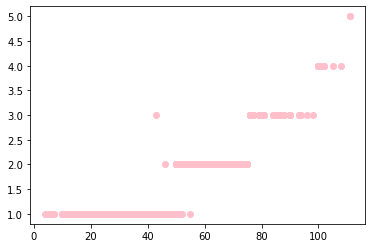

In [5]:
x = rads['Score']
y = rads['Level']

plt.scatter(x, y, c ="pink")

plt.show()

#### Making my Date Column datetime and then making a Month and Year Column so I have those numbers in the dataframe

In [43]:
rads['Date']= pd.to_datetime(rads['Date'])

rads['Month'] = rads['Date'].dt.strftime('%m')
rads['Year'] = rads['Date'].dt.strftime('%y')
rads['Year'] = rads['Year'].astype('int')

#### An attempt to make the RADS Levels Over Time look nice as a visualization but it kind of looks bad in any plot type

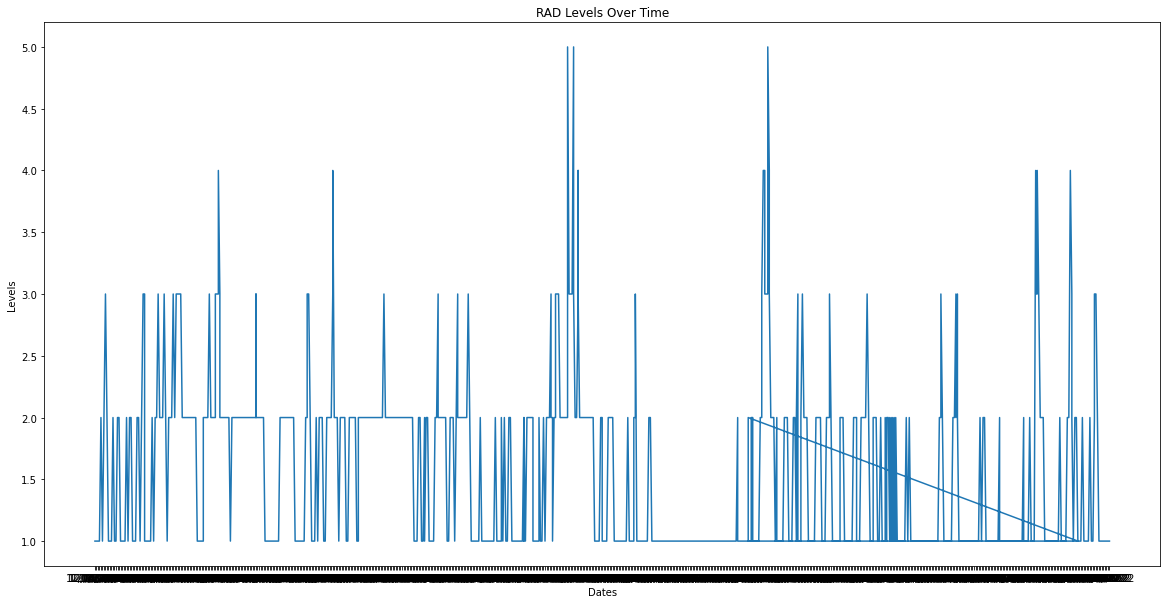

In [42]:
xx = rads['Date']
yy = rads['Level']

fig = plt.figure(figsize = (20, 10))
 
plt.plot(xx, yy)

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("RAD Levels Over Time")
plt.show()

#### Now I wanted to incorporate the avalanche data

#### Here is me trying to get the avalanche data in a line, this is not my best work but I tried really hard on this even though it just looks like a weird blob

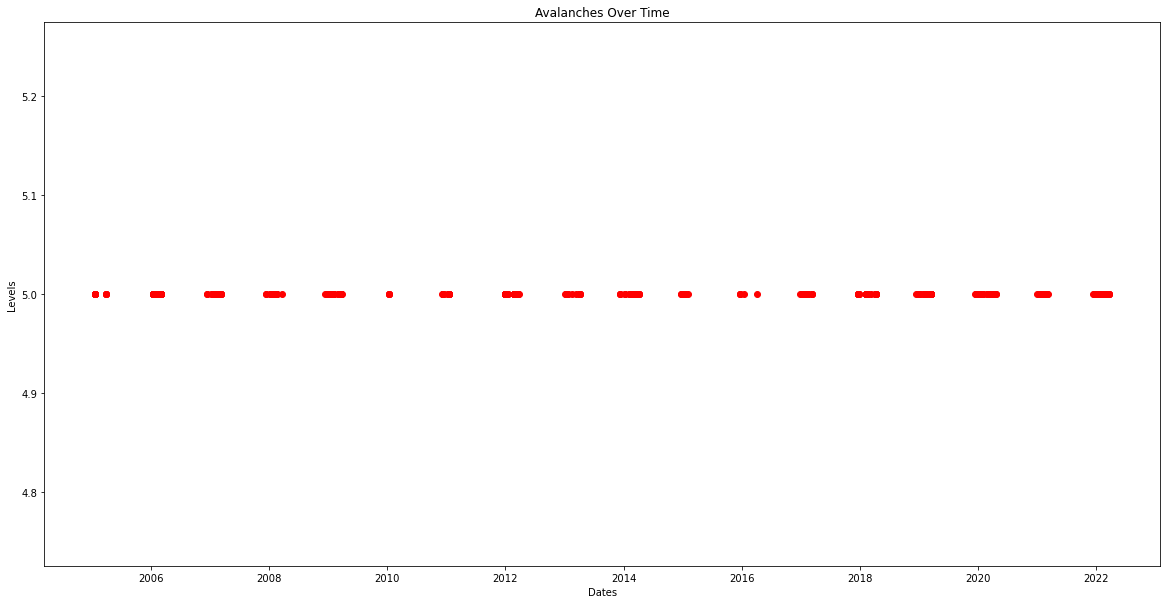

In [30]:
ex = avy['avobsdate']
why = avy['ignore']

fig = plt.figure(figsize = (20, 10))

plt.scatter(ex, why, color = 'red')

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("Avalanches Over Time")
plt.show()

#### Now I finally get the idea to combine the RADS Level dataframe and the Avalanche dataframe

In [31]:
avy['Date']= avy['avobsdate']

In [32]:
radsavy = pd.merge(rads, avy, on=["Date"])
#https://realpython.com/pandas-merge-join-and-concat/

#### Here I am trying to put the Avalanche line and the weird RADS Level lines together

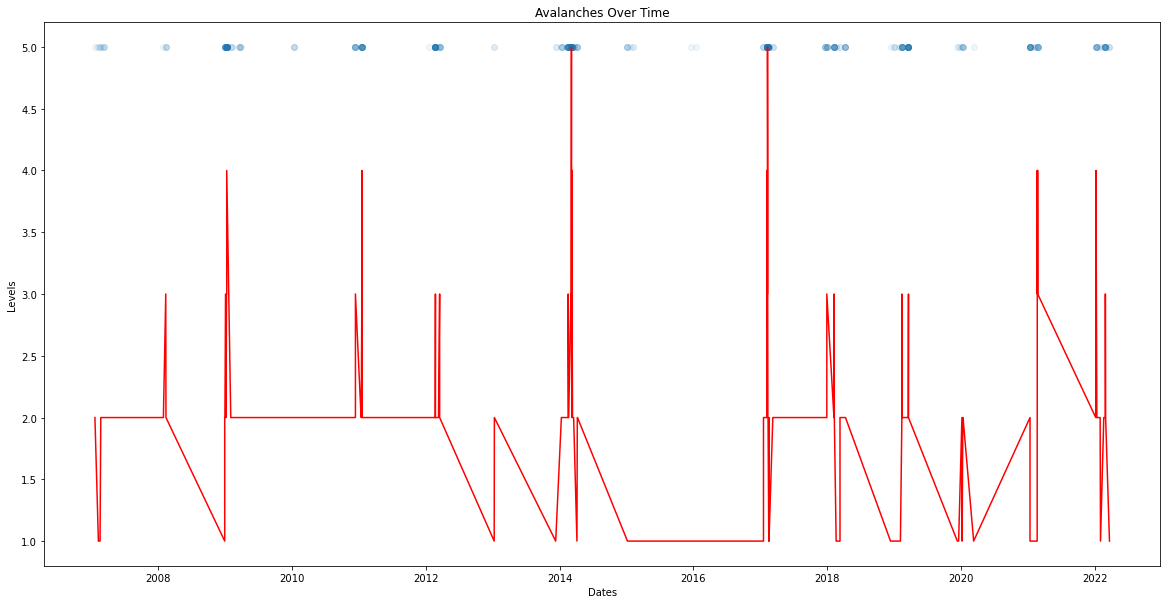

In [33]:
x = radsavy['Date']
y = radsavy['Level']
ys = radsavy['ignore']

fig = plt.figure(figsize = (20, 10))

plt.plot(x, y, color = 'red')
plt.scatter(x, ys, alpha=0.07)

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("Avalanches Over Time")
plt.show()

##### I declare that a flop ^

#### Here is where I finally decide that a pie chart is better. It took me a long time to come to this conclusion

In [34]:
levels = radsavy['Level'].value_counts()
levels

2    203
3    157
1     56
4     46
5     23
Name: Level, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8ec8d53040>,
 [Text(0.2783870693167807, 1.0641901332173749, 'Level 2'),
  Text(-0.9625611093707007, -0.532424746538932, 'Level 3'),
  Text(0.33991860076110825, -1.0461621981588756, 'Level 1'),
  Text(0.910388902891391, -0.6174075197891662, 'Level 4'),
  Text(1.0878148296335293, -0.16327552305650586, 'Level 5')])

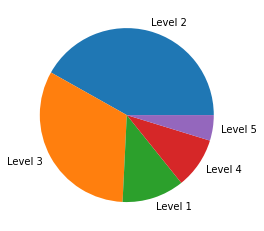

In [35]:
plt.pie(levels, labels = ['Level 2', 'Level 3', 'Level 1', 'Level 4', 'Level 5'])

#### Here is my Pie Chart of what RADS Level it is on the days that Avalanches are reported